<a href="https://colab.research.google.com/github/myktybekm/-21/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_MaxTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Библиотека для визуализации данных на основе Matplotlib.
import seaborn as sns
# Функция для разделения исходных данных на обучающую и тестовую выборки.
from sklearn.model_selection import train_test_split
# Класс для создания модели линейной регрессии.
from sklearn.linear_model import LinearRegression
# Метрики для оценки качества модели.
from sklearn.metrics import mean_squared_error, r2_score
# Функция для создания пайплайна — последовательности шагов обработки данных и обучения модели.Зачем нужна? Удобно объединять несколько операций (например, масштабирование + обучение модели) в один объект, который можно использовать как обычную модель.
from sklearn.pipeline import make_pipeline
# Класс для стандартизации признаков — приводит данные к виду со средним 0 и стандартным отклонением 1.Зачем нужна? Помогает улучшить работу моделей, особенно тех, которые чувствительны к масштабам признаков (например, линейная регрессия, градиентный бустинг).
from sklearn.preprocessing import StandardScaler
#Модель градиентного бустинга для задачи регрессии.Зачем нужна? Сильная и популярная модель, которая строит ансамбль слабых моделей (обычно деревьев решений), последовательно улучшая ошибки предыдущих. Хорошо работает с разными типами данных и часто превосходит простую линейную регрессию.
from sklearn.ensemble import GradientBoostingRegressor

1. seaborn (sns)
Это такая библиотека для рисования красивых графиков и диаграмм. Помогает быстро и легко показать данные визуально — например, гистограммы, точечные графики и т.д.

2. train_test_split
Это инструмент, который разбивает твои данные на две части: одну для обучения модели, другую — чтобы проверить, насколько модель хорошо учится. Так ты видишь, насколько модель работает на новых данных.

3. LinearRegression
Это простая модель, которая пытается предсказать число (например, температуру), подбирая лучшую прямую линию по твоим данным.

4. mean_squared_error и r2_score
Это способы проверить, насколько твои предсказания модели близки к настоящим значениям.

mean_squared_error (MSE) — показывает среднюю ошибку (чем меньше, тем лучше).

r2_score — показывает, какую часть данных модель объясняет (чем ближе к 1, тем лучше).

5. make_pipeline
Это как конвейер: сначала одна операция (например, подготовка данных), потом другая (обучение модели). Всё в одном месте, удобно использовать.

6. StandardScaler
Это инструмент, который меняет данные так, чтобы все числа были примерно одного масштаба — чтобы модель лучше понимала данные и училась быстрее.

7. GradientBoostingRegressor
Это более сложная модель, которая учится на ошибках предыдущих моделей и постепенно улучшает свои предсказания. Она часто даёт очень хорошие результаты.

In [30]:
# загружаем данные
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df = pd.read_csv('/content/drive/MyDrive/Weather_Data.csv')
df
  #Данные о погоде Бангладеш

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,11-01-22,10.5,17.9,8.6,19.6,0.0,No,2.0,7.8,SSE,...,W,SSE,22,20,73,52,1025.9,1025.3,2,2
3267,12-01-22,11.0,18.7,9.3,19.2,0.0,No,2.0,9.2,W,...,W,ESE,20,7,78,53,1028.5,1024.6,2,2
3268,13-01-22,10.2,17.3,9.4,17.7,0.0,No,2.4,2.7,W,...,WNW,N,15,13,85,56,1020.8,1015.0,6,6
3269,14-01-22,12.4,19.0,10.1,19.3,0.0,No,1.4,9.3,W,...,W,W,17,19,56,35,1017.3,1015.1,5,2


Содержание

Этот набор данных содержит около 10 лет ежедневных наблюдений за погодой из многих мест по всему Бангладешу. Он содержит наблюдения за погодными показателями для каждого дня с 2013 по 2022 год. Источник данных - http://data.gov.bd/dataset/live-weather-condition

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


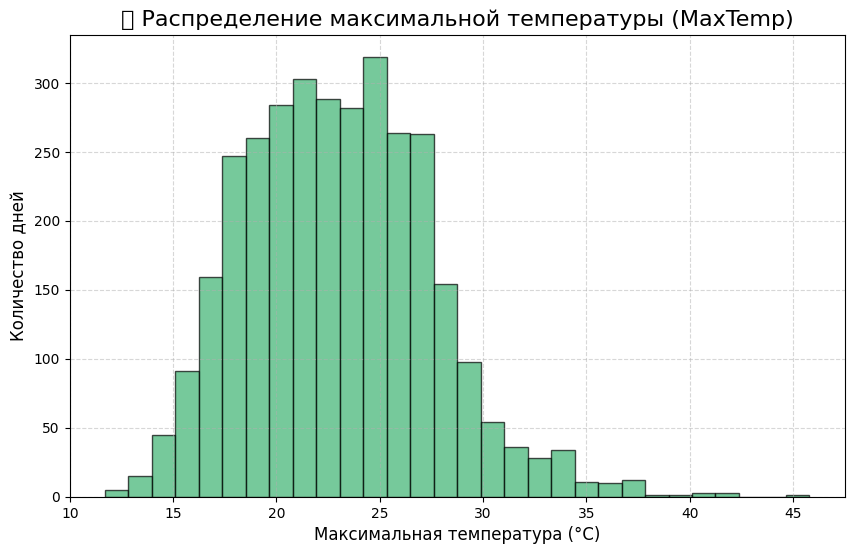

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['MaxTemp'], bins=30, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.title('🎯 Распределение максимальной температуры (MaxTemp)', fontsize=16)
plt.xlabel('Максимальная температура (°C)', fontsize=12)
plt.ylabel('Количество дней', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [33]:
# Предобработка данных
# Удалим ненужные столбцы с текстовыми данными
df = df.drop(columns=['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

**Описание данных**

**Date** - Дата наблюдения в формате ДД-ММ-ГГГГ

**MinTemp** - Минимальная температура в течение определенного дня. (градусы Цельсия)

**MaxTemp** - Максимальная температура в течение определенного дня. (градусы Цельсия)

**Rainfall** - Количество осадков в течение определенного дня. (миллиметры)

**Evaporation** - Испарение в течение определенного дня. (миллиметры)

**Sunshine** - Яркое солнечное сияние в течение определенного дня. (часы)

**WindGusDir** - Направление самого сильного порыва ветра в течение определенного дня. (16 румбов)

**WindGuSpeed** ​​- Скорость самого сильного порыва ветра в течение определенного дня. (километры в час)

**WindDir9am** - Направление ветра за 10 минут до 9 утра. (румбы компаса)

**WindDir3pm** - Направление ветра за 10 минут до 3 часов дня. (румбы компаса)

**WindSpeed9am** - Скорость ветра за 10 минут до 9 утра. (километров в час)

**WindSpeed3pm** - Скорость ветра за 10 минут до 15:00 (километров в час)

 **Humidity9am** - Влажность ветра в 9:00 (процентов )

**Humidity3pm** - Влажность ветра в 15:00 (процентов)

**Pressure9am** - Атмосферное давление в 9:00 (гектопаскали)

**Pressure3pm** - Атмосферное давление в 15:00 (гектопаскали) Cloud9am - Закрытые облаками части неба в 9:00 (восьмые)

**Cloud3pm** -
Закрытые облаками части неба в 15:00 (восьмые)

**Temp9am** - Температура в 9:00 (градусы Цельсия)

**Temp3pm** - Температура в 15:00 (градусы Цельсия)
 **RainToday** - Если сегодня дождливо, то «Да». Если сегодня не дождливо, то «Нет» .

In [7]:
# Преобразуем все данные в числа
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# Удалим строки с пропущенными значениями
df = df.dropna()

# Разделим признаки (X) и цель (y)
X = df.drop(columns=['MaxTemp'])
y = df['MaxTemp']

In [9]:
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Модель: масштабирование + Gradient Boosting
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
)

In [11]:
# Обучение
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=5,
                                           n_estimators=500,
                                           random_state=42))])

In [12]:
# Предсказания
y_pred = model.predict(X_test)

In [13]:
# Метрики
r2 = r2_score(y_test, y_pred)

print(" R² (точность):", round(r2 * 100, 2), "%")

 R² (точность): 94.39 %


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


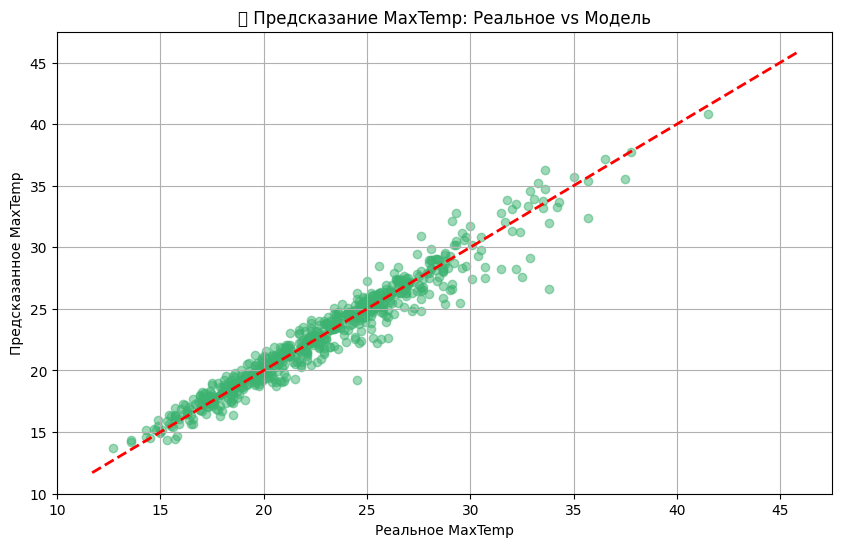

In [14]:
# Визуализация: Реальное vs Предсказанное
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='mediumseagreen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Реальное MaxTemp')
plt.ylabel('Предсказанное MaxTemp')
plt.title('🎯 Предсказание MaxTemp: Реальное vs Модель')
plt.grid(True)
plt.show()

In [15]:
# Вывод примеров предсказания
comparison = pd.DataFrame({
    'Реальное значение': y_test.values,
    'Предсказание': y_pred.round(2)
})
comparison.head(10)

,Реальное значение,Предсказание
0,21.3,21.83
1,15.3,15.94
2,26.1,26.52
3,14.8,15.16
4,16.7,17.26
5,24.8,25.42
6,25.0,25.02
7,20.4,20.35
8,20.1,19.79
9,27.6,30.95
